In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [23]:
def adap_hist_matching(source_im, target_im, D):
    output = np.zeros(source_im.shape).astype(np.uint8)
    M = np.zeros(256).astype(np.uint8)

    H1 = source_im.shape[0]
    H2 = target_im.shape[0]
    W1 = source_im.shape[1]
    W2 = target_im.shape[1]

    X = int(H2/(H1/D))
    Y = int(W2/(W1/D))

    src_H = int(np.ceil(source_im.shape[0] / D))
    src_W = int(np.ceil(source_im.shape[1] / D))

    for y_i in range(0, src_H):
        for x_i in range(0, src_W):

            src = source_im[y_i*D : y_i*D + D,
                                      x_i*D : x_i*D + D]

            ref = target_im[y_i*X : y_i*X + X,
                                      x_i*Y : x_i*Y + Y]

            hist, bins = np.histogram(src.flatten(), bins=256, density=True)
            hist_ref, bins = np.histogram(ref.flatten(), bins=256, density=True)

            sum_in = np.cumsum(hist)
            sum_out = np.cumsum(hist_ref)

            for idx in range(0, 255):
                abs_ = np.abs(sum_in[idx] - sum_out)
                for i,x in enumerate(abs_):
                    if x == np.min(abs_):
                        M[idx] = i

            img_new = M[src.flatten()]
            img_new = np.reshape(img_new, ref.shape)

            output[y_i*D:y_i*D + D,x_i*D:x_i*D + D] = img_new

    return output

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

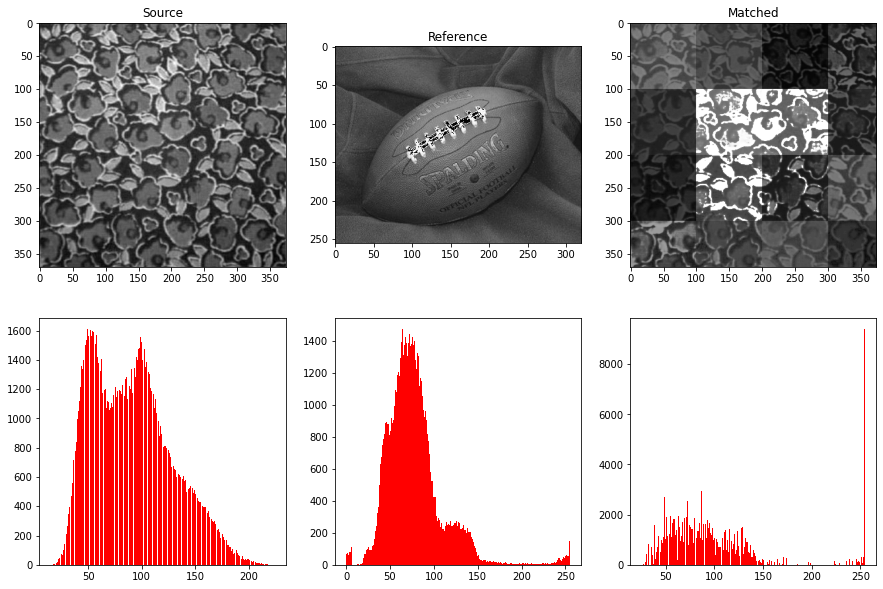

In [22]:
fabric = cv2.imread("./imgs/fabric.jpg")
football = cv2.imread("./imgs/football.jpg")

image = rgb2gray(fabric).astype(np.uint8)
ref_image = rgb2gray(football).astype(np.uint8)

output = adap_hist_matching(image, ref_image, 100)

plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.imshow(image, cmap=plt.cm.gray)
plt.title("Source")
plt.subplot(232)
plt.imshow(ref_image, cmap=plt.cm.gray)
plt.title("Reference")
plt.subplot(233)
plt.imshow(output, cmap=plt.cm.gray)
plt.title("Matched")
plt.subplot(234)
plt.hist(image.flatten(), bins=255, histtype='bar', color='red')
plt.subplot(235)
plt.hist(ref_image.flatten(), bins=255, histtype='bar', color='red')
plt.subplot(236)
plt.hist(output.flatten(), bins=255, histtype='bar', color='red')
plt.show()